In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df['Month'] = df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [10]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### Total and Average Sales by Department: Identifying top-performing departments and evaluating their average sales performance.

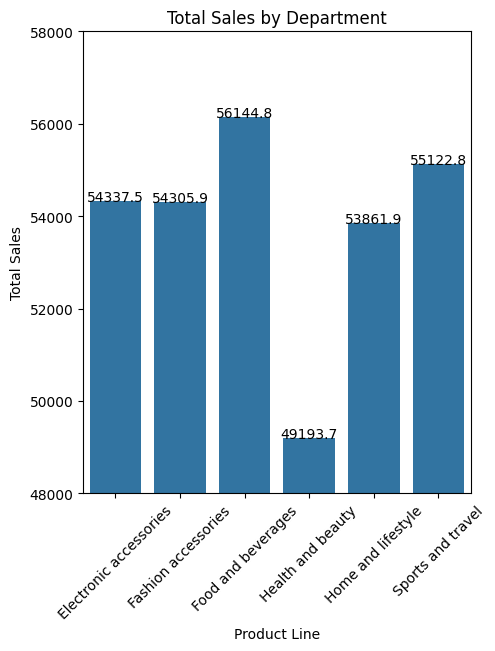

In [62]:
total_sales_by_dept = df.groupby('Product line')['Total'].sum().reset_index()
average_sales_by_dept = df.groupby('Product line')['Total'].mean().reset_index()

# Plot total sales by department
plt.figure(figsize=(5, 6))
sns.barplot(x='Product line', y='Total', data=total_sales_by_dept)
plt.title('Total Sales by Department')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.ylim(48000, 58000)
plt.xticks(rotation=45)

for index, row in total_sales_by_dept.iterrows():
    plt.text(index, row['Total'], round(row['Total'], 1), color='black', ha="center")
    
plt.show()

#### Seasonal Trends: Analyzing sales data across different months to determine peak sales periods.

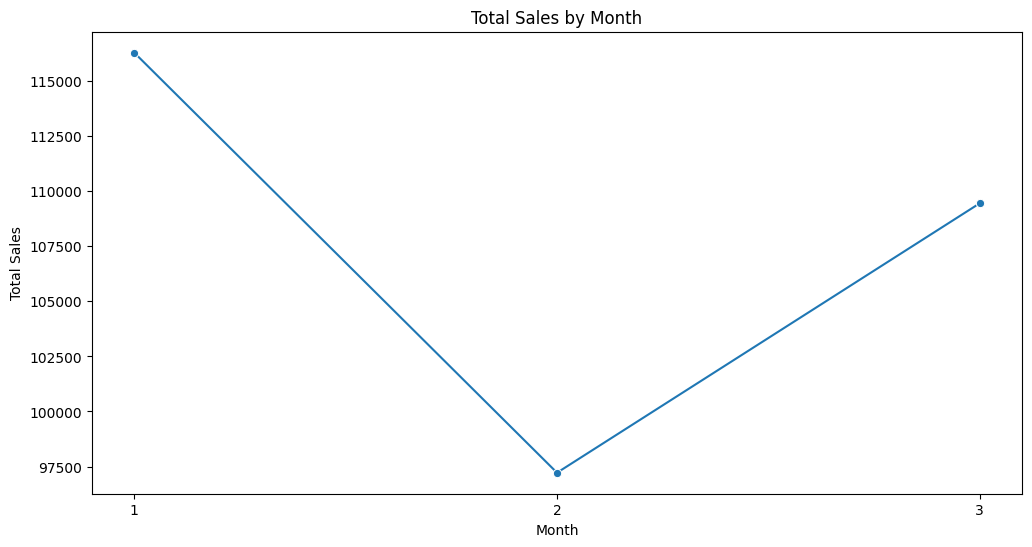

In [50]:
seasonal_trend = df.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total', data=seasonal_trend, marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 4))
plt.show()

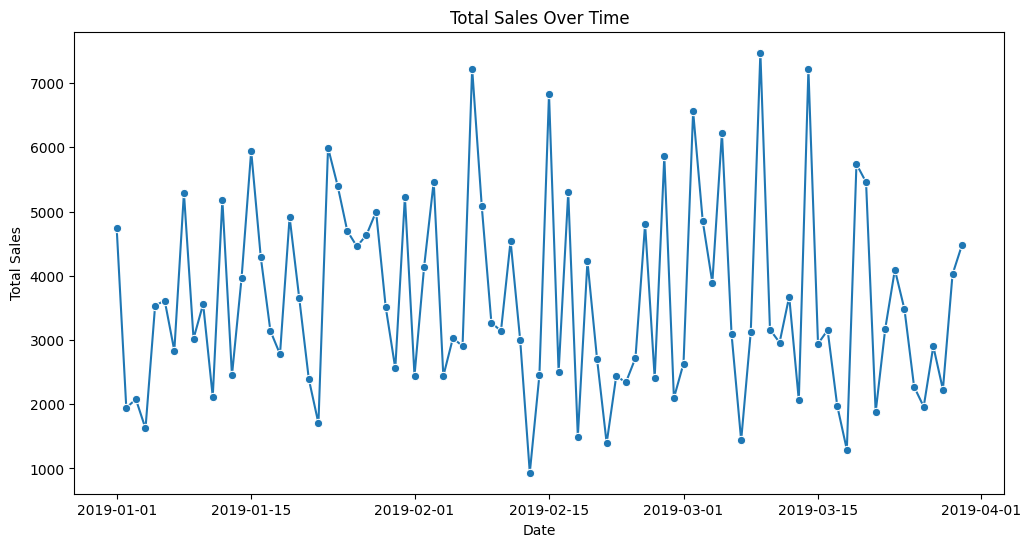

In [52]:
# Total sales by date
total_sales_by_date = df.groupby('Date')['Total'].sum().reset_index()

# Plot total sales by date
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=total_sales_by_date, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

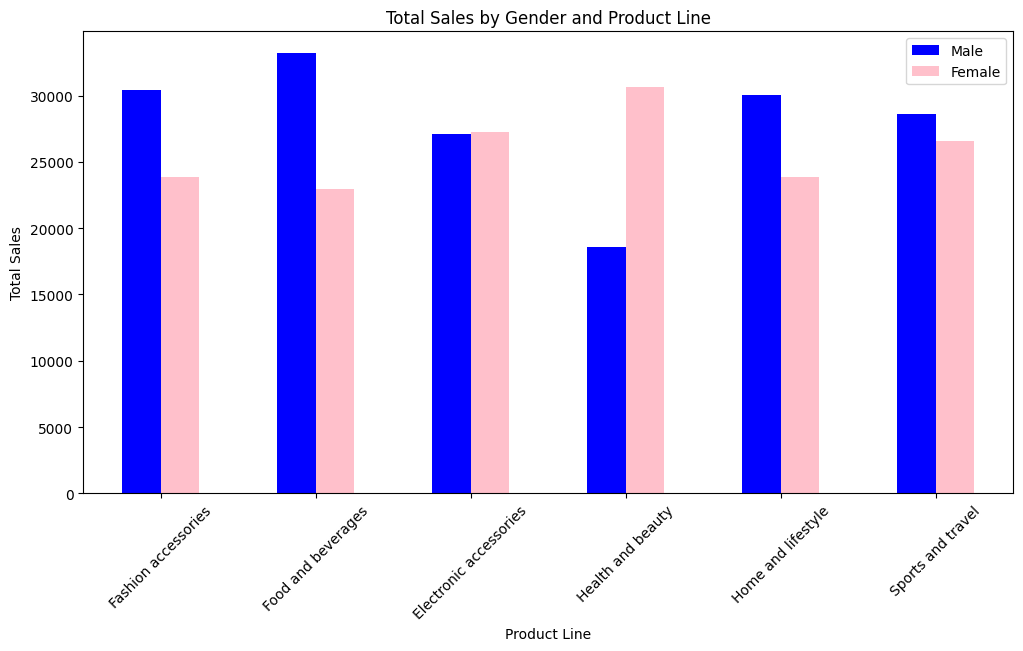

In [54]:
# Total sales by gender and product line
total_sales_by_gender_product = df.groupby(['Gender', 'Product line'])['Total'].sum().unstack()

# Reorder the data for plotting
total_sales_by_gender_product = total_sales_by_gender_product[['Fashion accessories', 'Food and beverages', 'Electronic accessories', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']]
total_sales_by_gender_product = total_sales_by_gender_product.stack().unstack(level=0).reset_index()

# Plot total sales by gender and product line
total_sales_by_gender_product.plot(kind='bar', x='Product line', figsize=(12, 6), color=['blue', 'pink'])
plt.title('Total Sales by Gender and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(['Male', 'Female'])
plt.show()

#### Sales by City and Payment Method: Understanding the relationship between sales performance, city locations, and preferred payment methods.

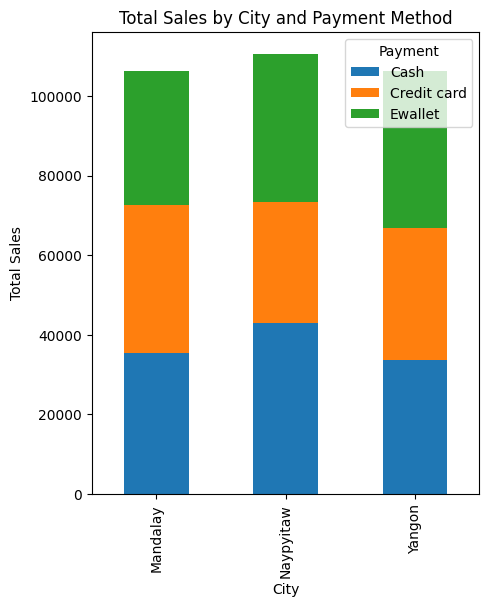

In [61]:
total_sales_by_city_payment = df.groupby(['City', 'Payment'])['Total'].sum().unstack()
# Plot total sales by city and payment method
total_sales_by_city_payment.plot(kind='bar', stacked=True, figsize=(5, 6))
plt.title('Total Sales by City and Payment Method')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [65]:
# Insights and Recommendations
def generate_insights(df):
    insights = []

    # Insight 1: Top-performing departments
    top_dept = total_sales_by_dept.sort_values(by='Total', ascending=False)
    insights.append(f"Top-performing departments are: {', '.join(top_dept['Product line'].head(3))}")

    # Insight 2: Seasonal trends
    peak_month = seasonal_trend.sort_values(by='Total', ascending=False).iloc[0]['Month']
    insights.append(f"The peak sales month is {peak_month}. Consider running promotions during this month.")

    # Insight 3: Preferred payment methods
    preferred_payment = total_sales_by_city_payment.idxmax(axis=1)
    for city in preferred_payment.index:
        insights.append(f"In {city}, the preferred payment method is {preferred_payment[city]}.")

    # Insight 4: Customer types and sales
    sales_by_customer_type = df.groupby('Customer type')['Total'].sum().reset_index()
    top_customer_type = sales_by_customer_type.sort_values(by='Total', ascending=False).iloc[0]['Customer type']
    insights.append(f"Majority of the sales are from {top_customer_type} customers. Focus marketing efforts on this segment.")

    return insights

# Generate and display insights
insights = generate_insights(df)
for i, insight in enumerate(insights, 1):
    print(f"Insight {i}: {insight}")

# Display the summary statistics
df.describe()

Insight 1: Top-performing departments are: Food and beverages, Sports and travel, Electronic accessories
Insight 2: The peak sales month is 1.0. Consider running promotions during this month.
Insight 3: In Mandalay, the preferred payment method is Credit card.
Insight 4: In Naypyitaw, the preferred payment method is Cash.
Insight 5: In Yangon, the preferred payment method is Ewallet.
Insight 6: Majority of the sales are from Member customers. Focus marketing efforts on this segment.


,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270,1.993000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000,3.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,0.835254


#### Customer Types: Examining sales by customer type to tailor marketing efforts.




**Objective:** Increase sales for the highest-performing department, 'Food and beverages'.

**Current Performance:** 
- Total Sales: $56144.84

**Plan of Execution:**
1. **Promotion Campaign:**
   - **Discount Offers:** Provide a 10% discount on all products in the 'Food and beverages' category.
   - **Bundle Deals:** Offer bundle deals where customers get a complimentary product from another department with every purchase over a certain amount.
   - **Loyalty Points:** Double the loyalty points for members purchasing items from the 'Food and beverages' category during the promotion period.

2. **Marketing Strategies:**
   - **Email Marketing:** Send out targeted emails to customers highlighting the discount offers and bundle deals.
   - **Social Media Campaigns:** Use social media platforms to promote the campaign, highlighting the benefits and deals.
   - **In-store Promotions:** Use in-store posters and flyers to inform customers about the ongoing promotion.

3. **Duration:** 
  

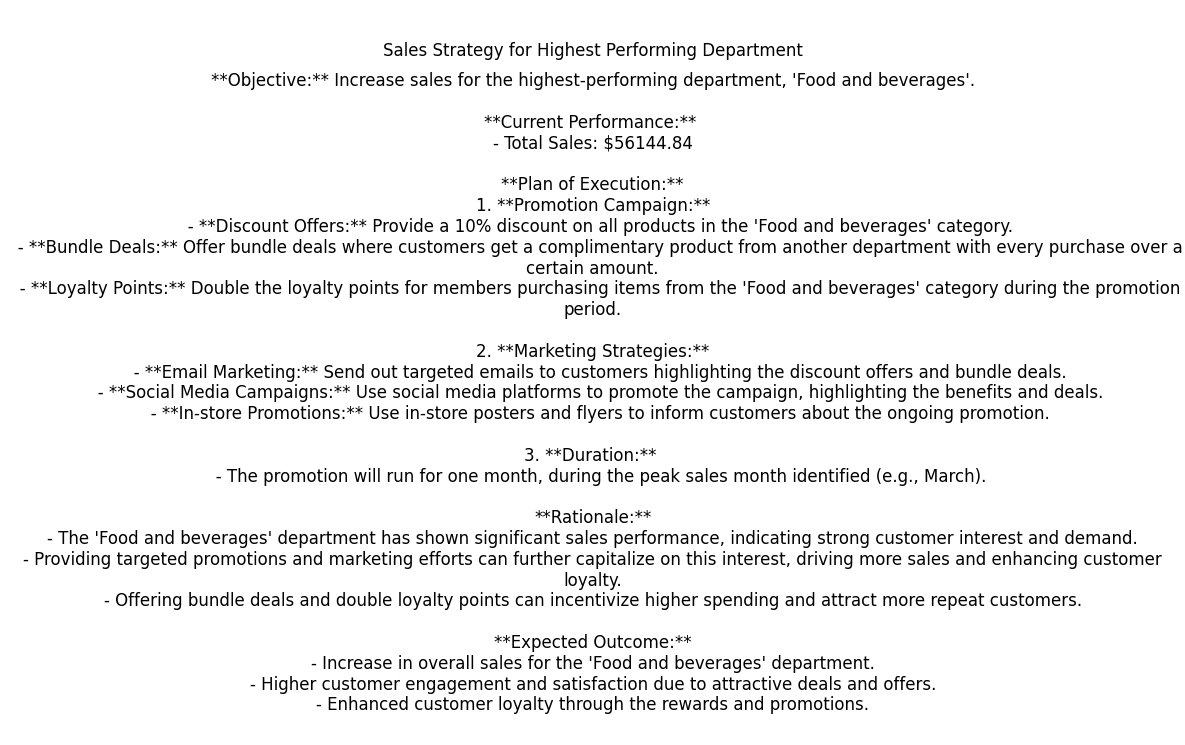

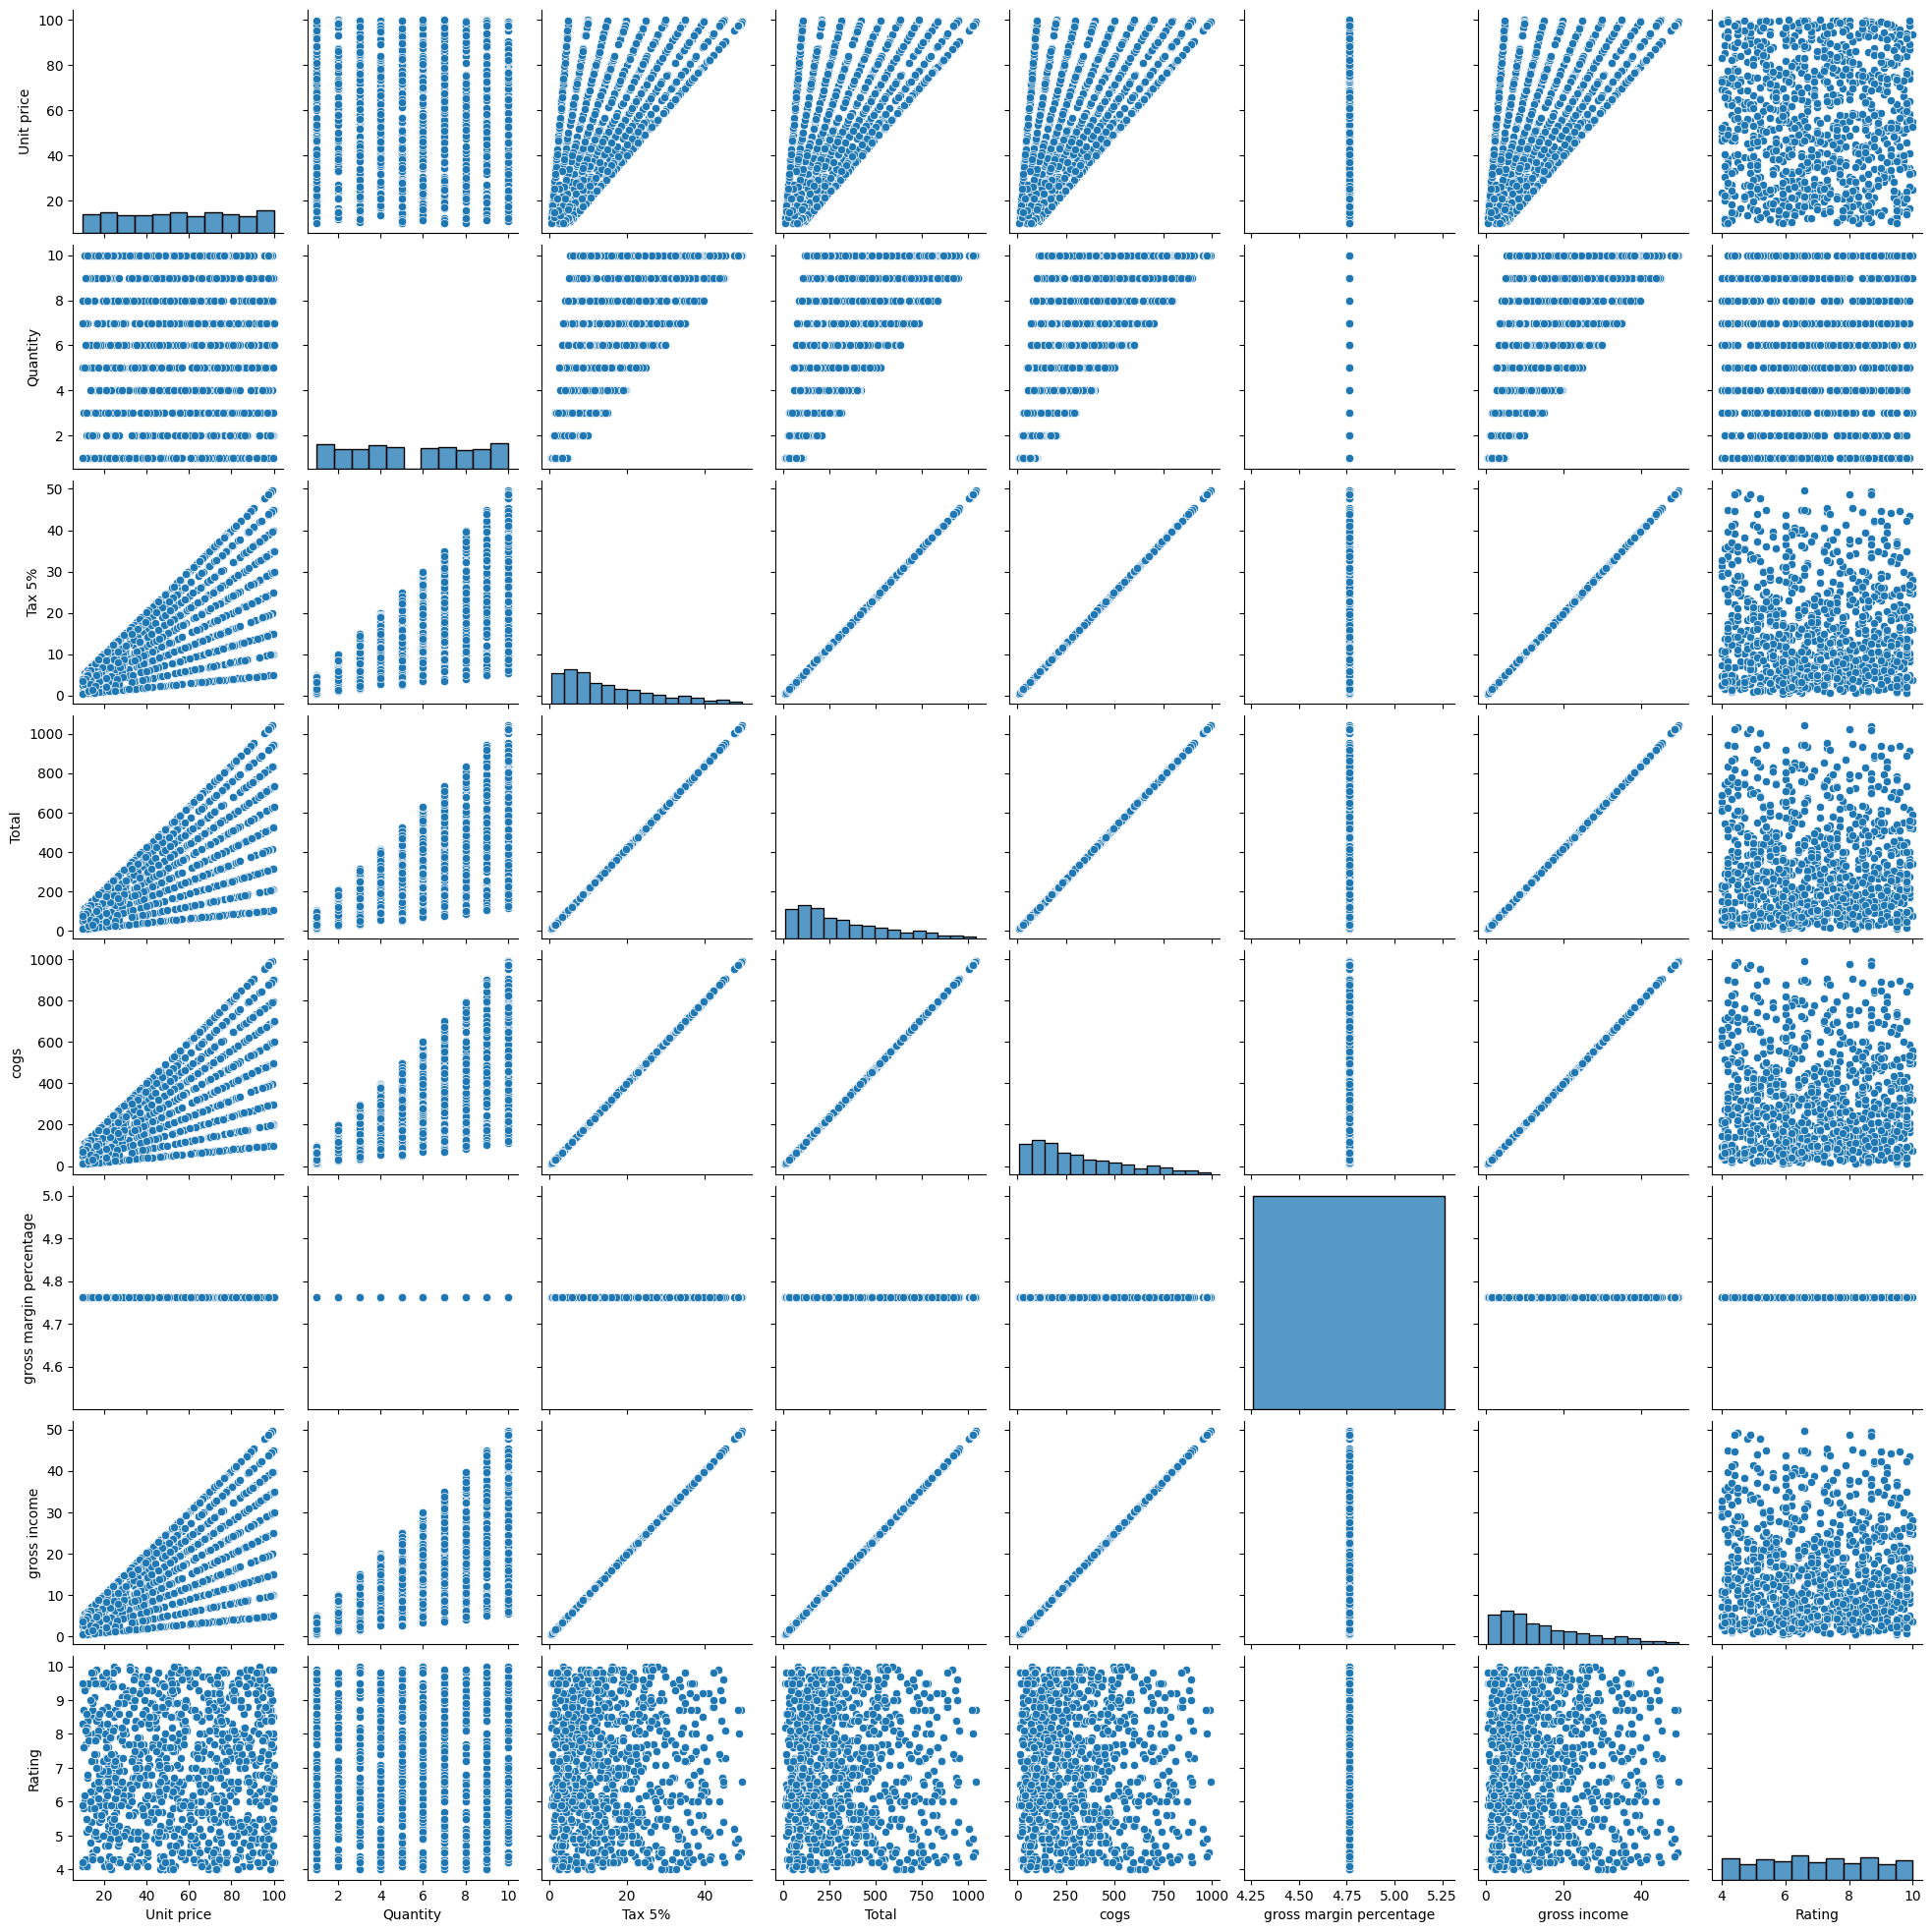

In [70]:
# Sales Strategy Development
# Identify the highest performing department
highest_performing_dept = total_sales_by_dept.sort_values(by='Total', ascending=False).iloc[0]['Product line']
total_sales_highest_dept = total_sales_by_dept.sort_values(by='Total', ascending=False).iloc[0]['Total']

# Sales Strategy Plan
strategy = f"""


**Objective:** Increase sales for the highest-performing department, '{highest_performing_dept}'.

**Current Performance:** 
- Total Sales: ${total_sales_highest_dept:.2f}

**Plan of Execution:**
1. **Promotion Campaign:**
   - **Discount Offers:** Provide a 10% discount on all products in the '{highest_performing_dept}' category.
   - **Bundle Deals:** Offer bundle deals where customers get a complimentary product from another department with every purchase over a certain amount.
   - **Loyalty Points:** Double the loyalty points for members purchasing items from the '{highest_performing_dept}' category during the promotion period.

2. **Marketing Strategies:**
   - **Email Marketing:** Send out targeted emails to customers highlighting the discount offers and bundle deals.
   - **Social Media Campaigns:** Use social media platforms to promote the campaign, highlighting the benefits and deals.
   - **In-store Promotions:** Use in-store posters and flyers to inform customers about the ongoing promotion.

3. **Duration:** 
   - The promotion will run for one month, during the peak sales month identified (e.g., March).

**Rationale:**
- The '{highest_performing_dept}' department has shown significant sales performance, indicating strong customer interest and demand.
- Providing targeted promotions and marketing efforts can further capitalize on this interest, driving more sales and enhancing customer loyalty.
- Offering bundle deals and double loyalty points can incentivize higher spending and attract more repeat customers.

**Expected Outcome:**
- Increase in overall sales for the '{highest_performing_dept}' department.
- Higher customer engagement and satisfaction due to attractive deals and offers.
- Enhanced customer loyalty through the rewards and promotions.
"""

# Display the sales strategy
print(strategy)

# Plot sales strategy details (as a mock page display)
fig, ax = plt.subplots(figsize=(12, 8))
ax.text(0.5, 0.5, strategy, horizontalalignment='center', verticalalignment='center', wrap=True, fontsize=12)
ax.axis('off')
plt.title('Sales Strategy for Highest Performing Department')
plt.show()

# Create a pair plot of numerical values
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
sns.pairplot(df[numerical_columns])
plt.show()